<a href="https://colab.research.google.com/github/viv-defy/bitespeed/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#An Exploratory analysis of Netflix dataset

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#Data Cleaning

In [119]:
# missing values

missing_values = df.isna().sum()
missing_values

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [90]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')
df['release_year'] = df['release_year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [91]:
# duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [92]:
genres = df['listed_in'].str.split(', ')
unique_genres = genres.explode().unique()
unique_genres

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [93]:
movies_count = df[df['type'] == 'Movie'].shape[0]
tv_shows_count = df[df['type'] == 'TV Show'].shape[0]
print(f"Number of movies: {movies_count}")
print(f"Number of TV shows: {tv_shows_count}")

Number of movies: 6131
Number of TV shows: 2676


In [94]:
# genre wise count of movies and tv shows
genres_count = genres.explode().value_counts()  # Count occurrences and get top 5
genres_count

,count
listed_in,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


In [95]:
# year with the highest number of content releases based on the data
year_counts = df['release_year'].value_counts()
year_counts

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1959,1
1925,1
1961,1


In [96]:
# content by list of directors
director_counts = df['director'].value_counts()
director_counts

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
...,...
"Raymie Muzquiz, Stu Livingston",1
Joe Menendez,1
Eric Bross,1


In [97]:
# countries with the most content
country_counts = df['country'].value_counts()
country_counts

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
...,...
"Romania, Bulgaria, Hungary",1
"Uruguay, Guatemala",1
"France, Senegal, Belgium",1


In [98]:
# average duration of movies and tv shows in the dataset
movie_durations = df[df['type'] == 'Movie']['duration'].dropna().str.extract('(\d+)').astype(int)
movie_average_duration = movie_durations.mean()

tv_show_duration = df[df['type'] == 'TV Show']['duration'].dropna().str.extract('(\d+)').astype(int)
tv_average_duration = tv_show_duration.mean()

print(f'average_duration of movies: {movie_average_duration.values[0].round(2)} minutes')
print(f'average_duration of tv shoes: {tv_average_duration.values[0].round(2)} seasons')

average_duration of movies: 99.58 minutes
average_duration of tv shoes: 1.76 seasons


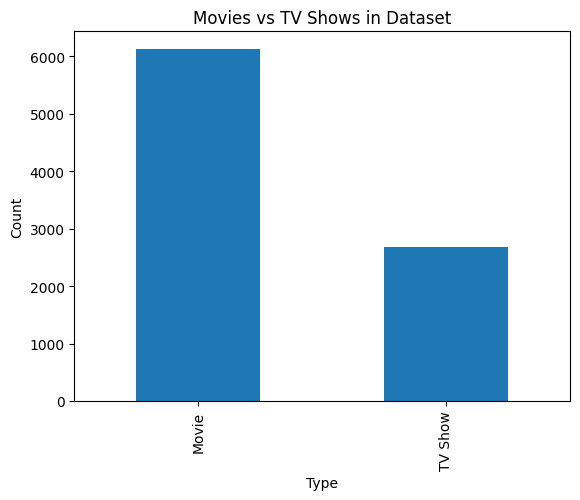

In [99]:
# movies vs tv shows in bar chart
type_counts = df['type'].value_counts()
type_counts.plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Movies vs TV Shows in Dataset')
plt.show()

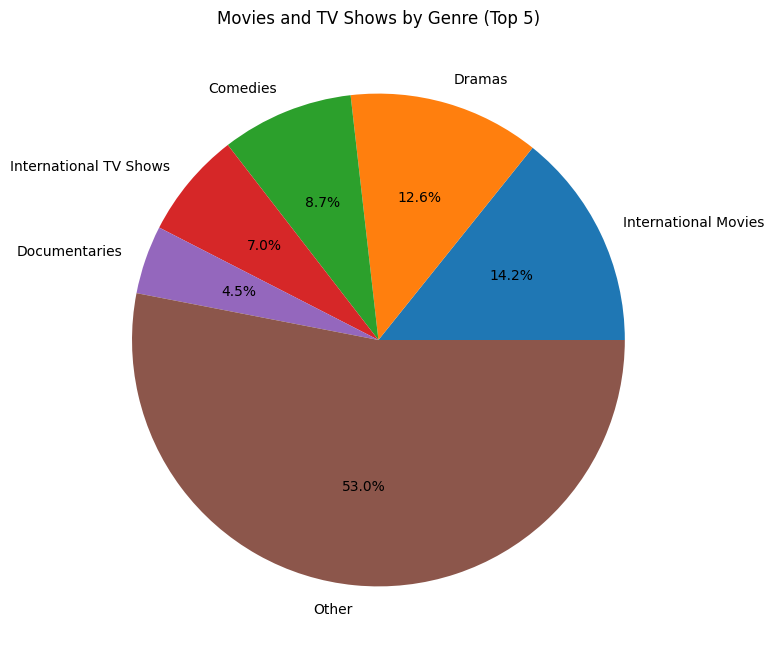

In [100]:
# pie chart of movies and tv shows by genre
genre_counts = genres.explode().value_counts()
counts = genre_counts.values


# Get the top 5 genres
top_5_genres = genre_counts.head(5)
other_count = genre_counts.iloc[5:].sum()  # Sum of all other genres

# Append "Other" if necessary
if other_count > 0:
    top_5_genres["Other"] = other_count

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_genres.values, labels=top_5_genres.index, autopct='%1.1f%%')
plt.title('Movies and TV Shows by Genre (Top 5)')
plt.show()

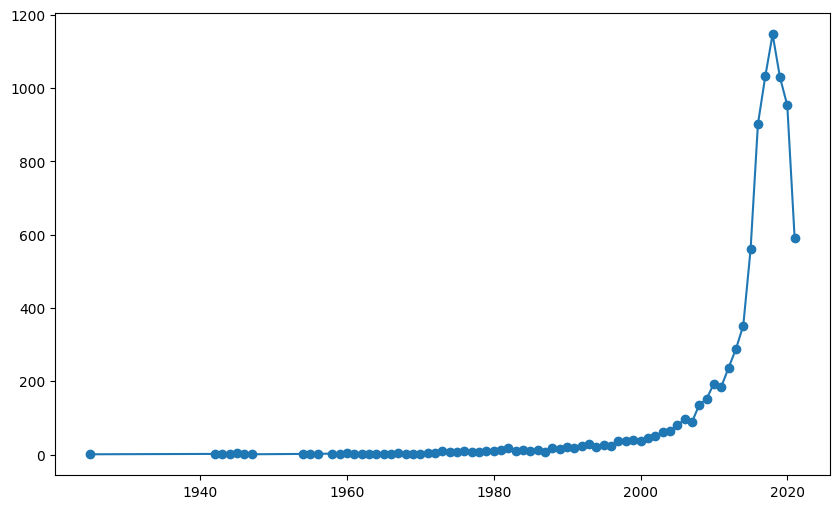

In [101]:
# line chart for number of content releases per year
year_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='o')

(array([2.400e+01, 1.230e+02, 1.300e+02, 3.200e+02, 4.960e+02, 1.599e+03,
        1.709e+03, 8.600e+02, 4.960e+02, 1.960e+02, 1.050e+02, 3.900e+01,
        1.400e+01, 8.000e+00, 5.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  3.  ,  18.45,  33.9 ,  49.35,  64.8 ,  80.25,  95.7 , 111.15,
        126.6 , 142.05, 157.5 , 172.95, 188.4 , 203.85, 219.3 , 234.75,
        250.2 , 265.65, 281.1 , 296.55, 312.  ]),
 <BarContainer object of 20 artists>)

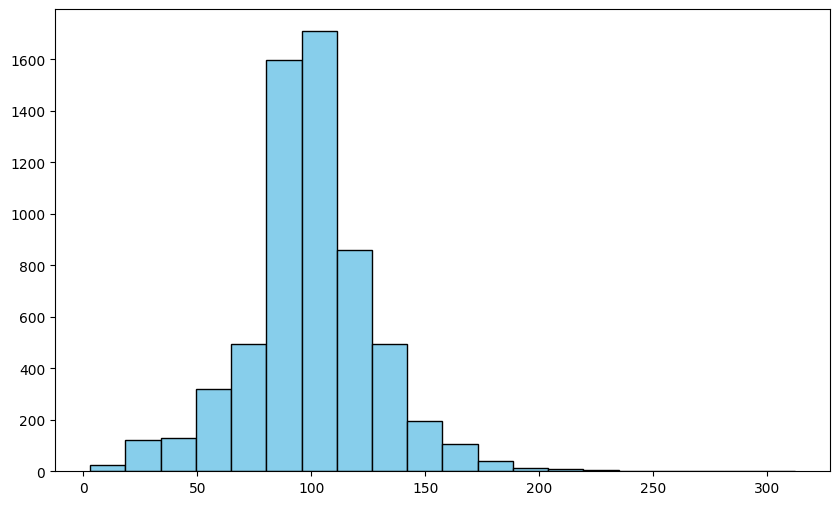

In [102]:
# histogram of movie durations
durations = df[df['type'] == 'Movie']['duration'].dropna().str.extract('(\d+)').astype(int)
plt.figure(figsize=(10, 6))
plt.hist(durations, bins=20, color='skyblue', edgecolor='black')

<Axes: >

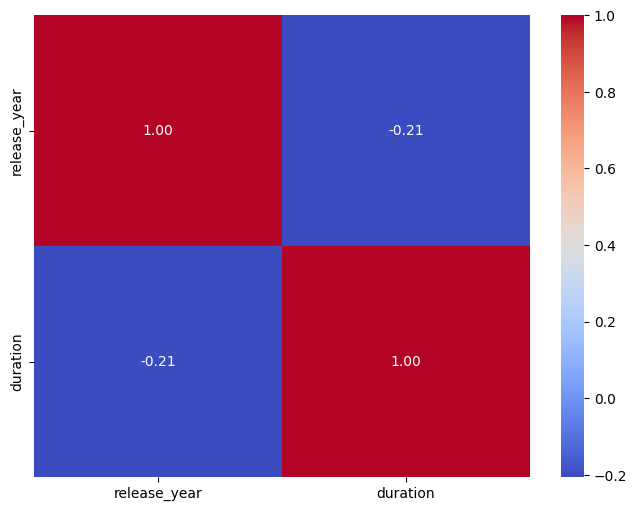

In [115]:
# heat map of correlation between numerical columns for movies
movies = df[df['type'] == 'Movie']
numerical_columns = movies[['release_year', 'duration']].copy()  # Explicitly create a copy

numerical_columns['release_year'] = numerical_columns['release_year'].astype(int)
numerical_columns['duration'] = numerical_columns['duration'].dropna().str.extract('(\d+)').astype(int)
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

<Axes: >

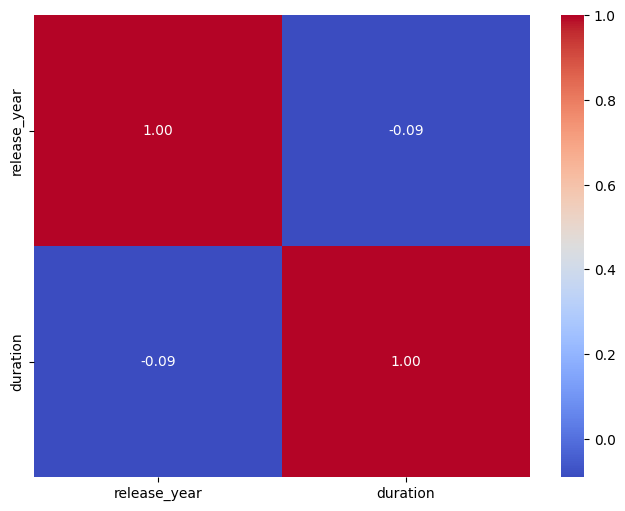

In [118]:
# heat map of correlation between numerical columns for tv shoes
movies = df[df['type'] == 'TV Show']
numerical_columns = movies[['release_year', 'duration']].copy()  # Explicitly create a copy

numerical_columns['release_year'] = numerical_columns['release_year'].astype(int)
numerical_columns['duration'] = numerical_columns['duration'].dropna().str.extract('(\d+)').astype(int)
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")